## [실습5] Resnet 사용하기



### 학습 목표
---
- Pretrained 되어있는 딥러닝 모델을 불러오기
- Resnet을 활용하는 코드를 작성하기
- Resnet을 사용해 강아지/고양이 품종 예측모델 만들기


In [ ]:
# 필요한 라이브러리 불러오기
import tensorflow as tf
import tensorflow_datasets as tfds
 
import matplotlib.pyplot as plt
import cv2

In [ ]:
# cats and dogs 데이터셋 불러오기
# - tfds 라는 텐서플로에서 제공하는 데이터셋에서 고양이와 강아지 데이터를 받아옴

# 2022.06.07경 데이터셋 변경
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

data, data_info = tfds.load('cats_vs_dogs', split=[tfds.Split.TRAIN], with_info=True)
data_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteDRPJQ1/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    version=4.0.0,
    description='A large set of images of cats and dogs.There are 1738 corrupted images that are dropped.',
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=23262,
    splits={
        'train': 23262,
    },
    supervised_keys=('image', 'label'),
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and Saul, Jared},
    title = {Asirra: A CAPTCHA that Exploits Interest-Aligned Manual Image Categorization},
    booktitle = {Proceedings of 14th ACM Conference on Computer and Communications Security (CCS)},
    ye

이미지 데이터 23262개를 받아왔음을 알 수 있습니다.

In [ ]:
# 불러온 데이터셋이 어떤 것들이 있는지 확인해 보기
# 50개를 가져와 보기
imgs = [d['image'].numpy() for d in data[0].take(50)]
len(imgs)

50

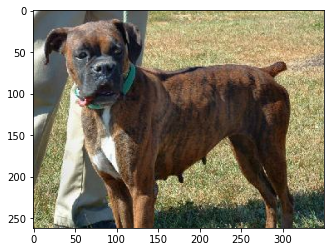

In [ ]:
# 이미지 데이터를 plt로 확인해 보기
plt.imshow(imgs[0])

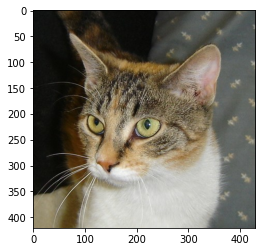

In [ ]:
plt.imshow(imgs[15])

In [ ]:
# pretrained 되어있는 모델을 불러오자 : Resnet
resnet50 = tf.keras.applications.""" Your Answer """
resnet50

102981632/102967424 [==============================] - 1s 0us/step


텐서플로우로부터 이미 사전학습된 Resnet을 불러왔습니다. </br>
weights에 imagenet을 넣어주면, 약 120만개의 이미지넷 학습데이터로 학습된 모형을 불러올 수 있습니다. </br>
앞선 실습에서 우리가 했던 모델을 정의하고, compile하고, fit(학습) 까지 완료된 상태의 모델을 바로 가져와 활용할 수 있습니다.

In [ ]:
# 모델 확인
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

앞선 실습에서 우리가 직접 만든 모델에 비해 훨씬 복잡해 보이죠? <br/></br>
입력으로 224x224 크기의 컬러(RGB 3차원) 이미지를 입력받아<br/> 
다양한 Conv 및 Pooling 레이어들을 거친 후, 최종적으로는 <br/>
1000개의 레이블 중 하나로 분류 결과를 내놓는 모델입니다.

In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [ ]:
def model_pred(img):
  # 우선 이미지를 보여줌
  plt.imshow(img)
  plt.axis('off')
  plt. show()

  # resnet의 입력 데이터는 224x224 사이즈이므로, resizing
  img_resized = """ Your Answer """

  # resnet50 모델에게 1개의 3차원(RGB, 컬러)인 224x224 사이즈 이미지를 예측하게 함
  pred = resnet50.predict(img_resized.reshape([1, 224, 224, 3]))

  # 모델의 예측 결과를 사람이 보기 편한 형태로 가공
  # 텐서플로에서 제공하는 decode_predictions 메서드 활용
  decoded_pred = decode_predictions(pred)
  print('[예측 결과]')
  for i, instance in enumerate(decoded_pred[0]):
    print('{}위: {} ({:.2f}%)'.format(i+1, instance[1], instance[2]*100))  

(참고) </br>
pred 값 자체는 모델이 1000개의 레이블들 각각에 대해 계산된 확률값을 가진 리스트 입니다. 지난 실습들에서 본 기억이 나죠?

ex) <br/>
[[1.34194513e-08 7.19607929e-09 2.67511648e-08 3.43265611e-07 <br/>
  2.10268979e-07 2.34674786e-08 4.11103995e-09 3.06652126e-08 <br/>
  3.97867304e-08 1.95724645e-08 9.29238186e-10 6.34599817e-10 <br/>
  5.92524074e-09 1.45048695e-09 7.22640747e-09 3.72513220e-09 <br/>
  3.49343621e-09 8.04612466e-09 3.69525499e-09 5.00276764e-10 ... ]]

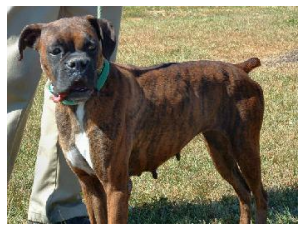

49152/35363 [=========================================] - 0s 0us/step
[예측 결과]
1위: boxer (84.50%)
2위: German_short-haired_pointer (9.20%)
3위: Weimaraner (2.95%)
4위: Great_Dane (0.90%)
5위: giant_schnauzer (0.42%)


In [ ]:
# 예측 결과 확인하기
model_pred(imgs[0])

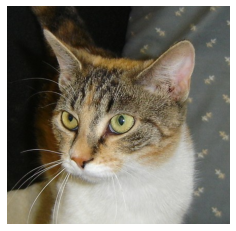

[예측 결과]
1위: tabby (45.78%)
2위: tiger_cat (30.16%)
3위: Egyptian_cat (9.22%)
4위: lynx (4.09%)
5위: Siamese_cat (3.26%)


In [ ]:
# 예측 결과 확인하기
model_pred(imgs[15])

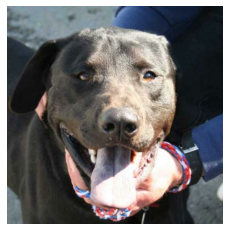

[예측 결과]
1위: American_Staffordshire_terrier (79.58%)
2위: Weimaraner (8.67%)
3위: Great_Dane (3.24%)
4위: bull_mastiff (2.97%)
5위: Staffordshire_bullterrier (2.26%)


In [ ]:
# 예측 결과 확인하기
model_pred(imgs[10])

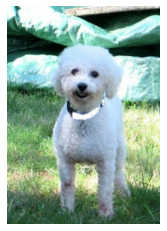

[예측 결과]
1위: toy_poodle (89.88%)
2위: standard_poodle (3.22%)
3위: Pomeranian (2.37%)
4위: miniature_poodle (1.59%)
5위: chow (0.77%)


In [ ]:
# 예측 결과 확인하기
model_pred(imgs[30])

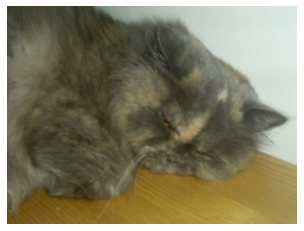

[예측 결과]
1위: Persian_cat (97.13%)
2위: lynx (0.61%)
3위: Angora (0.59%)
4위: Norfolk_terrier (0.15%)
5위: chow (0.15%)


In [ ]:
# 예측 결과 확인하기
model_pred(imgs[47])